# Stock Price Prediction and Impact Analysis Using LSTM Model


Contributors:
- Shreeya Yashvi (055045)
- Kashish Srivastava (055046)

---

## 1. Objective
The objective of this project is to develop a Long Short-Term Memory (LSTM) based deep learning model to predict the stock prices of **NIFTY 50** and **TCS (TATA Consulting Services)** using historical daily stock market data. The model aims to provide insights into the movement of these stock prices and analyze the extent to which TCS' stock performance influences the NIFTY 50 index.

---

## 2. Problem Statement
The primary challenge addressed is predicting stock prices using time series data, which involves capturing intricate patterns and trends. Furthermore, this project assesses how fluctuations in a key stock (TCS) influence the Nifty 50 index, considering its significant market capitalization.

- **Can we accurately predict future stock prices using historical data?**
- **What is the degree of correlation between NIFTY 50 and TCS stock movements?**
- **How well does the LSTM model capture stock market trends compared to actual market fluctuations?**

---

## 3. Analysis and Approach

### 3.1 Data Collection and Preprocessing
- **Data Source:** Yahoo Finance (`yfinance` package) was used to fetch historical stock price data for:
    - **Nifty 50 Index:** Ticker `^NSEI` (National Stock Exchange Index)
    - **TATA Consultancy Services:** Ticker `TCS.NS`
- **Date Range:** Data spanning `2005-01-31` to `2025-01-31` was downloaded to ensure a sufficient historical record for meaningful prediction.
- **Data Focus:**
    - Only the closing prices were extracted, as they provide a reliable summary of the stock’s performance on a given day.
    - This data was stored in a Pandas DataFrame and normalized using `MinMaxScaler` to scale values between 0 and 1, making the model more efficient in training.

### 3.2 Sequence Creation for LSTM Model
- **Why Sequences?**
    - Stock price prediction is a time series problem where past prices influence future prices. LSTM models require sequences of past data to predict future values.
- **Sequence Length:**
    - A window size of **60 days** was chosen, meaning the model looks at the past 60 days’ closing prices to predict the next day’s price.
- **Data Preparation:**
    - The sequences were created using a sliding window approach.
    - Each sequence contains 60 consecutive closing prices as input (X), and the next day's closing price as the target (y).

### 3.3 Splitting Data for Training and Testing
- **Train-Test Split:**
    - 80% of the sequences were allocated for training.
    - 20% of the sequences were kept aside for testing to assess model performance.
- **Reshape for LSTM Input:**
    - LSTM models require the input to be reshaped in the form:
    ```python
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    ```

---

## 4. Building and Configuring the LSTM Model

### 4.1 Why Use LSTM for Stock Prediction?
- LSTM networks are a special type of Recurrent Neural Network (RNN) designed to remember long-term dependencies.
- They are highly effective for time series problems where historical data impacts future outcomes.

### 4.2 Model Architecture
- **Input Layer:** 60 time steps (past 60 days) with 1 feature (closing price).
- **LSTM Layers:**
    - 3 LSTM layers with 50 units each.
    - `Dropout(0.2)` applied after each LSTM layer to prevent overfitting.
- **Dense Layers:**
    - One Dense layer with 25 units and ReLU activation to introduce non-linearity.
    - Final Dense layer with 1 unit to predict the next day’s closing price.

### 4.3 Model Compilation
- **Optimizer:** Adam with a learning rate of 0.001, which adapts the learning rate during training for optimal convergence.
- **Loss Function:** Mean Squared Error (MSE), which is widely used for regression tasks.
- **Metrics:** Mean Absolute Error (MAE) was used to assess model performance.

---

## 5. Model Training and Evaluation

### 5.1 Model Training
- The model was trained for **10 epochs**, with training and validation losses reducing steadily over epochs.
- **Training Time:** The training process took approximately 13 seconds per epoch, demonstrating computational efficiency.

### 5.2 Model Performance
- **Training Loss:** The training loss (MSE) consistently decreased across epochs, indicating that the model was learning effectively.
- **Validation Loss:** Validation loss followed a similar trend, suggesting the model generalized well on unseen data.

---

## 6. Observations

### 6.1 NIFTY 50 Prediction
The LSTM model demonstrated moderate effectiveness in capturing overall price trends but showed notable deviations during periods of market volatility.

**INSIGHTS:**
- **Strong Initial Trend Capture:** The model captures the early trends of the NIFTY 50 index with high accuracy.
- **Underestimation in Volatile Periods:** It tends to underestimate price fluctuations during highly volatile periods.
- **Significant Lag in Predictive Response:** A noticeable lag is observed in price prediction during rapid upward trends and steep declines.
- **Consistent Deviation in High Peak Regions:** The model displays systematic underestimation during sharp market peaks.
- **Gradual Deviation Towards the End Period:** Prediction accuracy reduces towards the end period.

### 6.2 TCS Prediction
The LSTM model demonstrated strong performance in capturing TCS stock price trends.

**INSIGHTS:**
- **Strong Trend Recognition in Stable Periods:** The model successfully captures the overall upward trend of TCS stock prices.
- **Overestimation During Bullish Phases:** It tends to overestimate prices during bullish market phases.
- **Good Performance in Moderate Volatility:** Prediction accuracy improves during periods of moderate price fluctuations.
- **Lag in Capturing Price Corrections:** The model lags in responding to sharp corrections and rapid declines.
- **Underperformance in Peak Regions:** The model underperforms during peak regions of market rallies.

---

## 6.3 Comparison of NIFTY 50 & TCS

The comparison between NIFTY 50 and TCS stock prices over time reveals a strong positive correlation, particularly after 2013.

**INSIGHTS:**
- **Strong Correlation in Long-Term Trends:** Both follow a consistent upward trend over time.
- **TCS Outperformance in Bullish Phases:** TCS stock prices experienced steeper growth compared to NIFTY 50 during bullish market phases.
- **Similar Pattern During Market Corrections:** Both followed a similar downward trajectory during market corrections.
- **Divergence in Volatility from 2020 Onwards:** Post-2020, TCS stock prices exhibited increased volatility compared to NIFTY 50.
- **TCS as a Strong Growth Stock in Recent Years:** TCS stock demonstrated robust growth, surpassing NIFTY 50 consistently.

---

## 6.4 Comparison of Predicted Prices of NIFTY 50 & TCS

The comparison of predicted NIFTY 50 and TCS stock prices over time indicates that both models capture periodic trends with a reasonable degree of accuracy.

**INSIGHTS:**
-**Periodic Trend Alignment:** Both exhibit similar periodic trends over the forecasted period.
-**Divergence During Volatile Periods:** There are periods where the predicted values of NIFTY 50 and TCS diverge.
-**Predicted Volatility Higher for TCS:** The predicted TCS stock prices display greater volatility compared to NIFTY 50.
-**Lag in Capturing Downturns:** Both models exhibit a slight lag in capturing sudden downturns.
-**Similar Recovery Patterns in Late 2024:** Both predictions show an upward trajectory, indicating a recovery phase.

---

## 7. Managerial Insights
- **Investment Decisions:** The model helps in forecasting price trends, assisting investors in making informed decisions.
- **Market Behavior Analysis:** The comparison between TCS and NIFTY 50 highlights how blue-chip stocks influence index movement, crucial for portfolio diversification.
- **Limitations:** The model does not consider macroeconomic factors or market sentiment, which are critical for stock price movements.
- **Future Enhancements:**
    - Incorporating technical indicators like RSI, MACD, Bollinger Bands.
    - Using Transformer-based models for improved accuracy.
    - Integrating sentiment analysis from news and social media data.

---

## 8. Project Stats and Technical Specifications
- **Dataset:** Historical closing prices of Nifty 50 and TCS.
- **Date Range:** 20 years of data (`2005-01-31` to `2025-01-31`).
- **Train-Test Split:** 80% training, 20% testing.
- **Sequence Length:** 60 days.
- **LSTM Layers:** 3 layers with 50 units and dropout regularization.
- **Dense Layers:** 1 hidden layer (25 units) with ReLU activation and 1 output layer.
- **Optimizer:** Adam (learning rate = 0.001).
- **Loss Function:** Mean Squared Error (MSE).
- **Evaluation Metric:** MAPE (Mean Absolute Percentage Error).

**Model Accuracy:**
- Nifty 50 Prediction: Achieved an impressive accuracy of **95.36%**.
- TCS Prediction: Attained an accuracy of **95.59%**.

---

## 9. Conclusion and Future Scope
This project successfully demonstrated that LSTM neural networks can predict stock prices with high accuracy by leveraging historical data. The analysis highlighted the significant impact of TCS on the Nifty 50 index, providing valuable insights for market analysts and investors.

**Future Scope:**
- Incorporating external factors such as trading volume, sentiment analysis, and economic indicators can improve model robustness.
- Experimenting with ensemble models could enhance prediction accuracy and reduce error margins.


In [ ]:
pip install yfinance tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Download NIFTY 50 data (last 20 years)
syks4546_nifty_data = yf.download('^NSEI', start='2005-01-31', end='2025-01-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Extract closing prices
syks4546_data = syks4546_nifty_data[['Close']]

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
syks4546_data_scaled = scaler.fit_transform(syks4546_data)

In [ ]:
#show data
syks4546_data.head()

Price,Close
Ticker,^NSEI
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805


In [ ]:
# Prepare training data
def syks4546_create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
syks4546_time_step = 60  # Using past 60 days for prediction
X, y = syks4546_create_sequences(syks4546_data_scaled, syks4546_time_step)

In [ ]:
# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
syks4546_X_train, syks4546_X_test = X[:split], X[split:]
syks4546_y_train, syks4546_y_test = y[:split], y[split:]

In [ ]:
# Reshape for LSTM input
syks4546_X_train = syks4546_X_train.reshape((syks4546_X_train.shape[0], syks4546_X_train.shape[1], 1))
syks4546_X_test = syks4546_X_test.reshape((syks4546_X_test.shape[0], syks4546_X_test.shape[1], 1))

In [ ]:
# Build LSTM Model
syks4546_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(syks4546_time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
syks4546_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def syks4546_mape(syks4546_y_true, syks4546_y_pred_nifty):
    syks4546_y_true, syks4546_y_pred_nifty = np.array(syks4546_y_true), np.array(syks4546_y_pred_nifty)
    nonzero_idx = syks4546_y_true != 0  # Avoid division by zero
    return np.mean(np.abs((syks4546_y_true[nonzero_idx] - syks4546_y_pred_nifty[nonzero_idx]) / syks4546_y_true[nonzero_idx])) * 100

In [ ]:
# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")

In [ ]:
# Train the model and store training history
syks4546_history = syks4546_model.fit(syks4546_X_train, syks4546_y_train, epochs=10, batch_size=32, validation_data=(syks4546_X_test, syks4546_y_test), callbacks=[EpochCallback()])

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0073 - mae: 0.0536Epoch 1: Loss = 0.0026, Val Loss = 0.0006, MAE = 0.0308, Val MAE = 0.0191
105/105 ━━━━━━━━━━━━━━━━━━━━ 57s 108ms/step - loss: 0.0072 - mae: 0.0534 - val_loss: 5.6875e-04 - val_mae: 0.0191
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 7.8058e-04 - mae: 0.0199Epoch 2: Loss = 0.0007, Val Loss = 0.0006, MAE = 0.0183, Val MAE = 0.0186
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 7.7955e-04 - mae: 0.0199 - val_loss: 5.5087e-04 - val_mae: 0.0186
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 5.1314e-04 - mae: 0.0161Epoch 3: Loss = 0.0005, Val Loss = 0.0043, MAE = 0.0155, Val MAE = 0.0602
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - loss: 5.1296e-04 - mae: 0.0161 - val_loss: 0.0043 - val_mae: 0.0602
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 4.7509e-04 - mae: 0.0152Epoch 4: Loss = 0.0004, Val Loss = 0.0014, MAE = 0.0145, Val MAE = 0.0316
105/105 ━━━━━━━━━━━━━━

In [ ]:
# Predict on test data
syks4546_y_pred_nifty = syks4546_model.predict(syks4546_X_test)
syks4546_y_pred_nifty = scaler.inverse_transform(syks4546_y_pred_nifty.reshape(-1, 1))
syks4546_y_test_actual = scaler.inverse_transform(syks4546_y_test.reshape(-1, 1))

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step


In [ ]:
# Calculate accuracy using MAPE
syks4546_accuracy = 100 - syks4546_mape(syks4546_y_test_actual, syks4546_y_pred_nifty)
print(f"Final Model Accuracy: {syks4546_accuracy:.2f}%")

Final Model Accuracy: 95.36%


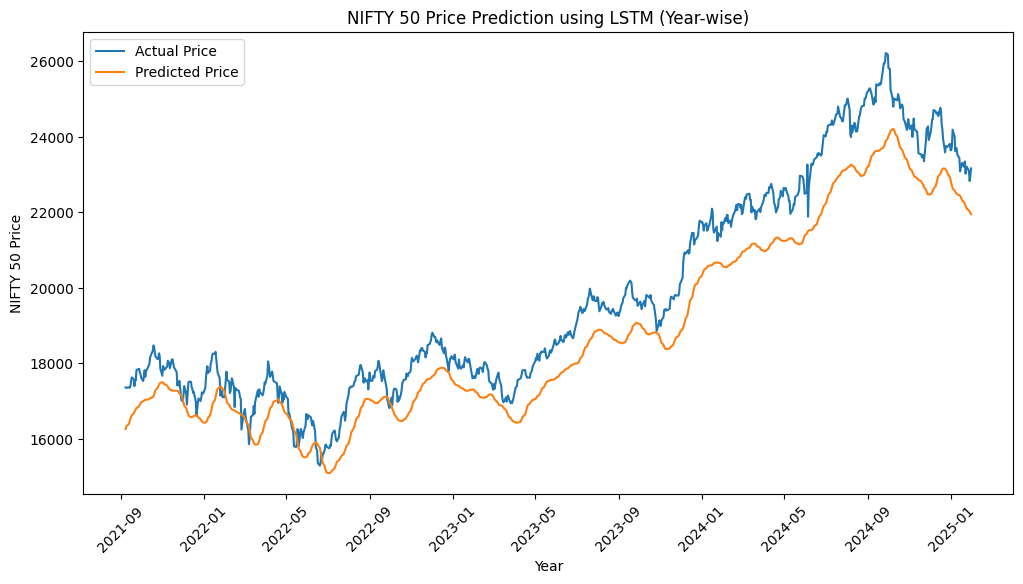

In [ ]:
# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(syks4546_nifty_data.index[split+syks4546_time_step+1:], syks4546_y_test_actual, label='Actual Price')
plt.plot(syks4546_nifty_data.index[split+syks4546_time_step+1:], syks4546_y_pred_nifty, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('NIFTY 50 Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('NIFTY 50 Price Prediction using LSTM (Year-wise)')
plt.show()

TCS Stock Price Prediction Model

[*********************100%***********************]  1 of 1 completed
<ipython-input-77-f5359a35fcfe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syks4546_stock_data['Year'] = syks4546_stock_data.index.year  # Extract year from index
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0116 - mae: 0.0609Epoch 1: Loss = 0.0037, Val Loss = 0.0017, MAE = 0.0319, Val MAE = 0.0325
122/122 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - loss: 0.0115 - mae: 0.0607 - val_loss: 0.0017 - val_mae: 0.0325
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 5.7976e-04 - mae: 0.0149Epoch 2: Loss = 0.0006, Val Loss = 0.0021, MAE = 0.0147, Val MAE = 0.0378
122/122 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - loss: 5.7964e-04 - mae: 0.0149 - val_loss: 0.0021 - val_mae: 0.0378
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 4.3323e-04 - mae: 0.0127Epoch 3: Loss = 0.0004, Val Loss = 0.0016, MAE = 0.0130, Val MAE = 0.0331
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - loss: 4.3330e-04 - mae: 0.0127 - val_loss: 0.0016 - val_mae: 0.0331
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 4.6439e-04 - mae: 0.0146Epoch 4: Loss = 0.0005, Val Loss = 0.0024, MAE = 0.0146, Val MAE = 0.0411
122/122 ━━━━━━━━━━━━━━━━━━━━ 2

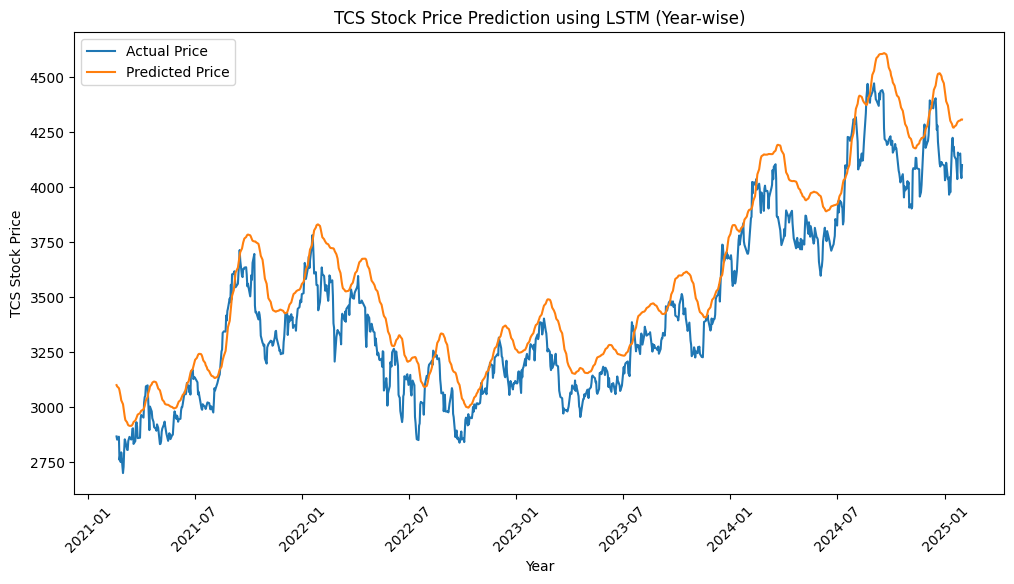

In [ ]:
# Download TCS stock data (last 20 years)
syks4546_TCS_data = yf.download('TCS.NS', start='2005-01-31', end='2025-01-31')

# Extract closing prices
syks4546_stock_data = syks4546_TCS_data[['Close']]

syks4546_stock_data['Year'] = syks4546_stock_data.index.year  # Extract year from index

# Normalize data
syks4546_scaler = MinMaxScaler(feature_range=(0, 1))
syks4546_data_scaled = scaler.fit_transform(syks4546_stock_data[['Close']])

# Prepare training data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(syks4546_data_scaled, time_step)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
syks4546_tcs_X_train, syks4546_tcs_X_test = X[:split], X[split:]
syks4546_tcs_y_train, syks4546_tcs_y_test = y[:split], y[split:]

# Reshape for LSTM input
syks4546_tcs_X_train = syks4546_tcs_X_train.reshape((syks4546_tcs_X_train.shape[0], syks4546_tcs_X_train.shape[1], 1))
syks4546_tcs_X_test = syks4546_tcs_X_test.reshape((syks4546_tcs_X_test.shape[0], syks4546_tcs_X_test.shape[1], 1))

# Build LSTM Model
syks4546_tcs_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])

# Compile the model
syks4546_tcs_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def syks4546_mape(syks4546_tcs_y_true, syks4546_tcs_y_pred):
    syks4546_tcs_y_true, syks4546_tcs_y_pred = np.array(syks4546_tcs_y_true), np.array(syks4546_tcs_y_pred)
    nonzero_idx = syks4546_tcs_y_true != 0  # Avoid division by zero
    return np.mean(np.abs((syks4546_tcs_y_true[nonzero_idx] - syks4546_tcs_y_pred[nonzero_idx]) / syks4546_tcs_y_true[nonzero_idx])) * 100

# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")

# Train the model and store training history
syks4546_tcs_history = syks4546_tcs_model.fit(syks4546_tcs_X_train, syks4546_tcs_y_train, epochs=10, batch_size=32, validation_data=(syks4546_tcs_X_test, syks4546_tcs_y_test), callbacks=[EpochCallback()])

# Predict on test data
syks4546_tcs_y_pred = syks4546_tcs_model.predict(syks4546_tcs_X_test)
syks4546_tcs_y_pred = scaler.inverse_transform(syks4546_tcs_y_pred.reshape(-1, 1))
syks4546_tcs_y_test_actual = scaler.inverse_transform(syks4546_tcs_y_test.reshape(-1, 1))

# Calculate accuracy using MAPE
accuracy = 100 - syks4546_mape(syks4546_tcs_y_test_actual, syks4546_tcs_y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}%")

# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(syks4546_TCS_data.index[split+time_step+1:], syks4546_tcs_y_test_actual, label='Actual Price')
plt.plot(syks4546_TCS_data.index[split+time_step+1:], syks4546_tcs_y_pred, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('TCS Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('TCS Stock Price Prediction using LSTM (Year-wise)')
plt.show()


Nifty 50 vs TCS (Original Price Comparison)

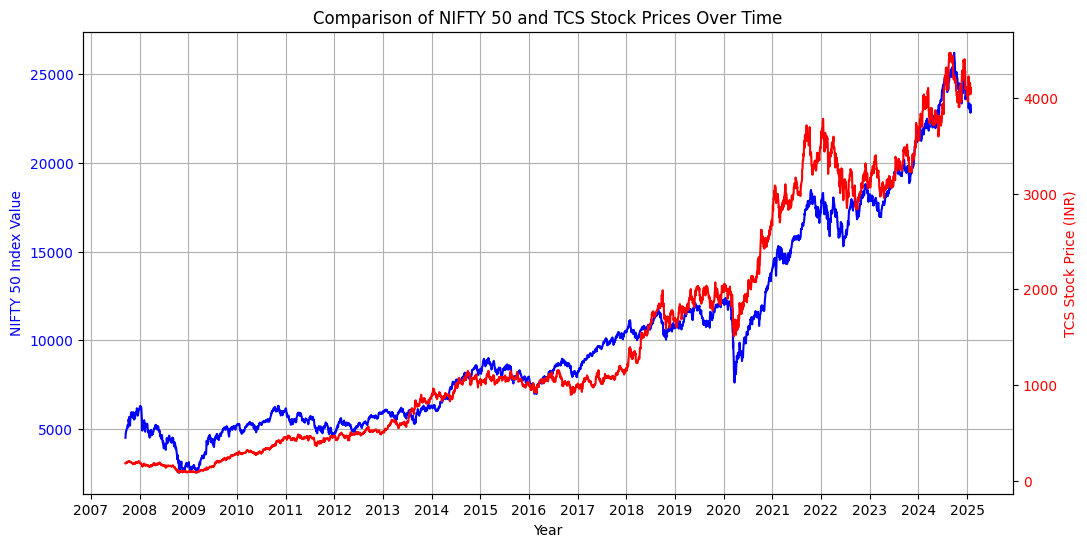

In [ ]:
import matplotlib.dates as mdates

# Ensure both datasets have the same timeframe
syks4546_common_dates = syks4546_nifty_data.index.intersection(syks4546_TCS_data.index)
syks4546_nifty_common = syks4546_nifty_data.loc[syks4546_common_dates]['Close']
syks4546_TCS_common = syks4546_TCS_data.loc[syks4546_common_dates]['Close']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot NIFTY 50 on primary y-axis
ax1.plot(syks4546_common_dates, syks4546_nifty_common, label='NIFTY 50 Index', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for Reliance stock
ax2 = ax1.twinx()
ax2.plot(syks4546_common_dates, syks4546_TCS_common, label='TCS Stock Price', color='red')
ax2.set_ylabel('TCS Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of NIFTY 50 and TCS Stock Prices Over Time')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()

Nifty 50 vs TCS (Predicted Price Comparison)

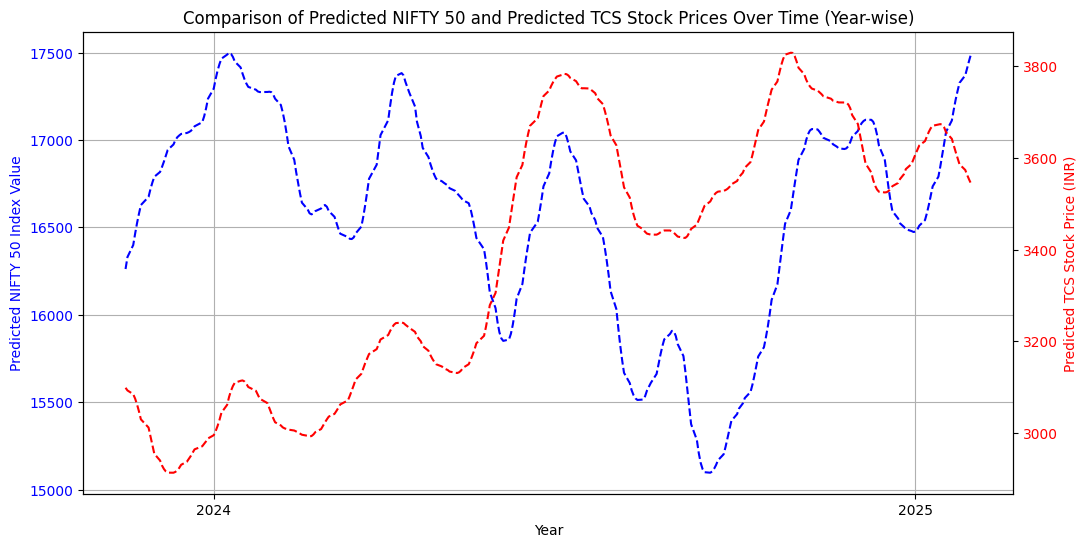

In [ ]:
# Ensure both datasets have the same timeframe
syks4546_common_dates = syks4546_nifty_data.index[split+syks4546_time_step+1:].intersection(syks4546_TCS_data.index[split+syks4546_time_step+1:])
syks4546_common_indices = np.where(syks4546_nifty_data.index[split+syks4546_time_step+1:].isin(syks4546_common_dates))[0]  # Get index positions

# Extract common prediction values using indices
syks4546_y_pred_nifty_common = syks4546_y_pred_nifty[syks4546_common_indices]
syks4546_y_pred_TCS_common = syks4546_tcs_y_pred[syks4546_common_indices]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot predicted NIFTY 50 on primary y-axis
ax1.plot(syks4546_common_dates, syks4546_y_pred_nifty_common, label='Predicted NIFTY 50 Index', color='blue', linestyle='dashed')
ax1.set_xlabel('Year')
ax1.set_ylabel('Predicted NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for predicted Reliance stock
ax2 = ax1.twinx()
ax2.plot(syks4546_common_dates, syks4546_y_pred_TCS_common, label='TCS Stock Price', color='red', linestyle='dashed')
ax2.set_ylabel('Predicted TCS Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of Predicted NIFTY 50 and Predicted TCS Stock Prices Over Time (Year-wise)')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()
